
# Project: Investigating the No-show appointments  Dataset .

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
<ul>
   <li> PatientId	</li>
    <li>AppointmentID	</li>
    <li>Gender	</li>
     <li> AppointmentDay	</li>
     <li> Age	</li>
     <li>Hipertension	</li>
     <li> Diabetes	</li>
    <li> Alcoholism	</li>
    <li> Handcap	</li>
     <li> SMS_received </li>
            
<li> ‘ScheduledDay’ tells us on what day the patient set up their appointment.</li>
<li> ‘Neighborhood’ indicates the location of the hospital.</li>
<li>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
<li> The last column says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</li>
</ul>
In this project the major question to be answered is; What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [3]:
#load required packages and magic words
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

We begin by loading the data into the workspace and printing out a few lines. Here we are able to have a general understanding of the data such as how the columns are constructed. We print the first five rows including the header row.
#-------Loading the data and printing the top 5 rows.

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
#-------Loading the data and printing the top 5 rows.
df=pd.read_csv('E:/UDACITY_DA/Project_1/noshowappointments-kagglev2-may-2016.csv', sep=',')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#Check the number of rows and columns
df.shape

(110527, 14)

The df.shape function informs us that the dataset contains 14 columns and 110527 rows

In [6]:
#Get more infomation about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The inbuilt function df.info() lists all the column names and datatypes. Upon running this function, we are able to identify that **ScheduledDay and AppointmentDay**  are recorded as text strings but they are supposed to be **Datetime**

In [7]:
#Get summary statistics for the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The df.describe() function gives a summary statistics. The minimum age is -1 but in essence a persons age cannot be lesss than 0. Later in the data cleaning process we drop this value(s) from our data set.

In [8]:
#Check whether there are duplicate values
df.duplicated().sum()

0

Upon running the **df.duplicated().sum()** we can clearly see that there are no duplicated values.

In [9]:
#Identifies values with Age less than 1
df.query('Age<0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


**df.query('Age<0')** checks the values where age is less than zero, we found there was only one value.

In [10]:
# Get a list of all unique values for each column.
nu=[df['Gender'].nunique(),df['Scholarship'].nunique(),df['Hipertension'].nunique(),df['Diabetes'].nunique(),df['Alcoholism'].nunique(),df['Handcap'].nunique(),df['SMS_received'].nunique(),df['No-show'].nunique()]
nu

[2, 2, 2, 2, 2, 5, 2, 2]

The above code generates a list of the unique values for Gender, Scholarship, Hipertension,	Diabetes, Alcoholism, Handcap,	SMS_received and No-show respectively. By so doing, we are able to check whether there are values which have been incorrectly captured. Our finding is that all values have been correctly captured.

array([[<AxesSubplot:title={'center':'PatientId'}>,
        <AxesSubplot:title={'center':'AppointmentID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hipertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>]], dtype=object)

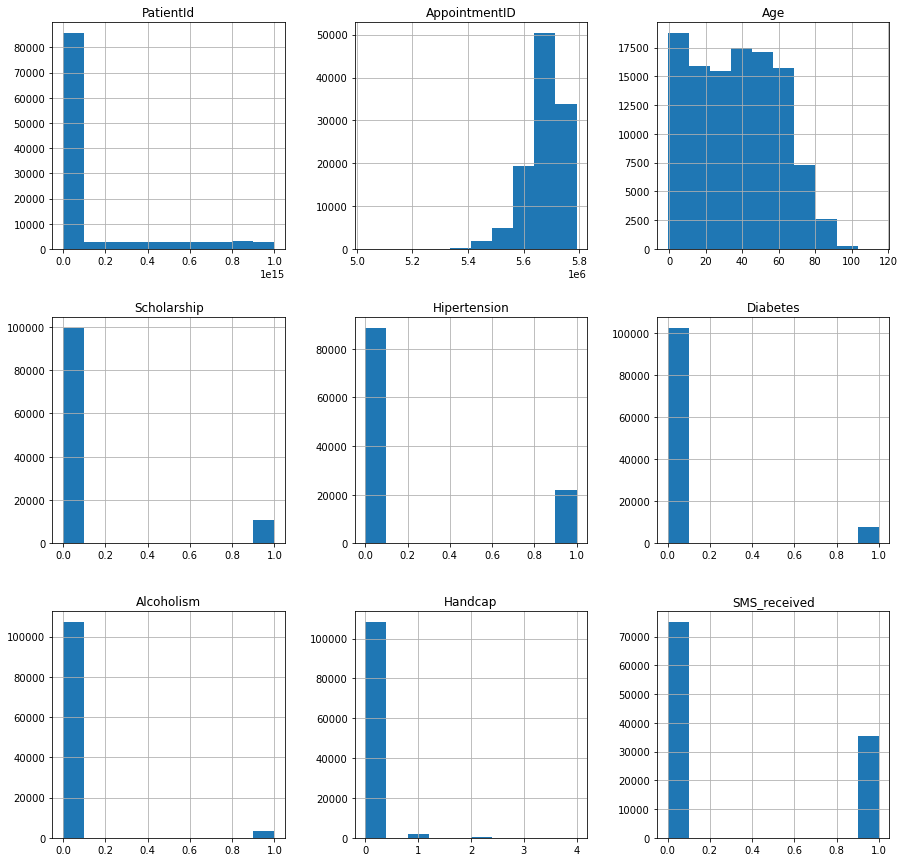

In [11]:
#Plot a histogram to get a general pictorial view of the data
df.hist(figsize=(15,15))

From the histogram plot above we will first ignore the plot for **PatientId	and AppointmentID** as they are not significant for the analysis and will be dropped later. The histogram for the age is skewed to the right, indicating that very few patients of older age are included in the dataset. Also we are able to depict the corresponding proportions of Scholarship, Hipertension	Diabetes, Alcoholism, Handcap and SMS_received statuses.

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Scholarship', ylabel='Age'>,
        <AxesSubplot:xlabel='Hypertension', ylabel='Age'>,
        <AxesSubplot:xlabel='Diabetes', ylabel='Age'>,
        <AxesSubplot:xlabel='Alcoholism', ylabel='Age'>,
        <AxesSubplot:xlabel='Handcap', ylabel='Age'>,
        <AxesSubplot:xlabel='SMS_received', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Scholarship'>,
        <AxesSubplot:xlabel='Scholarship', ylabel='Scholarship'>,
        <AxesSubplot:xlabel='Hypertension', ylabel='Scholarship'>,
        <AxesSubplot:xlabel='Diabetes', ylabel='Scholarship'>,
        <AxesSubplot:xlabel='Alcoholism', ylabel='Scholarship'>,
        <AxesSubplot:xlabel='Handcap', ylabel='Scholarship'>,
        <AxesSubplot:xlabel='SMS_received', ylabel='Scholarship'>],
       [<AxesSubplot:xlabel='Age', ylabel='Hypertension'>,
        <AxesSubplot:xlabel='Scholarship', ylabel='Hypertension'>,
        <AxesSubplot:xlabel='Hyp

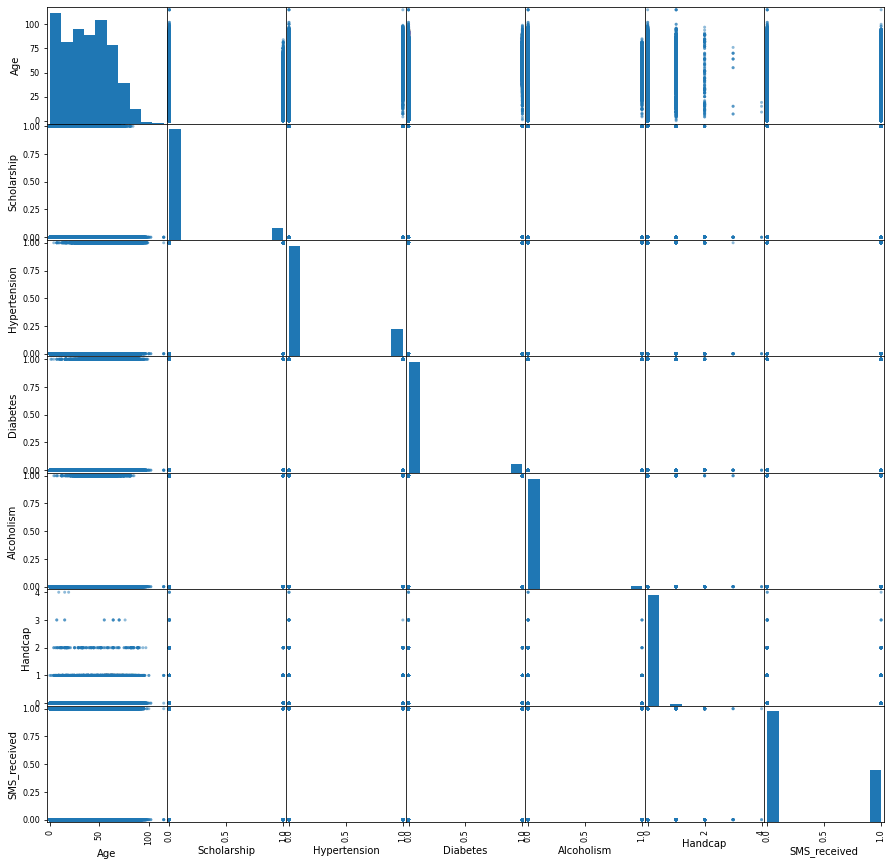

In [55]:
pd.plotting.scatter_matrix(df,figsize=(15,15))

The scatter plot above shows that there is no linear relationships between all the variables.

### Data Cleaning : Preparing the no-show patient  data for further analysis.

We start by dropping the columns which as not neccessary for exploratory analysis. Here we remove the PatientID and Appointment ID columns. We run the df.head() function to confirm that these two columns have been dropped.

In [12]:
#Drop patientId and AppointmentID columns because they are not relevant in the analysis
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Next we convert the 'ScheduledDay'	'AppointmentDay' datatype from string to Datetime. We run df.head() to run the top 5 rows so as to confirm the conversion of these datatypes.

In [13]:
df.ScheduledDay=df.ScheduledDay.apply(np.datetime64)
df.AppointmentDay=df.AppointmentDay.apply(np.datetime64)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Next we Correct the typo 'Hipertension'  to 'Hypertension' 


In [14]:
#Renaming Hipertension to Hypertension
df=df.rename(columns = {'Hipertension' : 'Hypertension'})

Next we remove the row(s) where the age is less than zero.

In [15]:
#Identify values with Age less than 1
df.query('Age<0')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [16]:
df.drop([99832], axis=0, inplace=True)

Next we creacte a new column 'DayOfWeek' which shows the day of week for any each 'AppointmentDay'. This column is appended in the dataset after the No-show column.

In [17]:
import datetime
#df['Day'] = df['AppointmentDay'].dt.weekday
df['day_of_week'] = df['AppointmentDay'].dt.day_name()
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,day_of_week
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


We now save the cleaned and transformed  data to another file, 'No_Show_cleaned', for further analysis.

In [18]:
#Save the cleaned and transformed  data to another file
df.to_csv('No_Show_cleaned',index=False)

<a id='eda'></a>
## Exploratory Data Analysis

>  Now that we've trimmed and cleaned our data, we now to move on to exploration. Here compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section. We Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Is there any relationship between gender and scheduled hospital appointments?

In this section, we begin by importing the cleaned and transformed data and print the top 5 rows

In [19]:
#we begin by importing our cleaned data
df_show=pd.read_csv('No_Show_cleaned')
df_show.head()


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,day_of_week
0,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,M,2016-04-29 16:08:27,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,F,2016-04-29 16:19:04,2016-04-29 00:00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,F,2016-04-29 17:29:31,2016-04-29 00:00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,F,2016-04-29 16:07:23,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


Next is that we group the patients who showed or not showed by gender and use the count funtion to get their tally. The code below groups the patients by gender and show up status, **30962** and **57245** males and females respectively showed up for the scheduled appointments. Those who didn't show up were **7725** and **14594** males and females respectively.

In [20]:
tally_sex=df_show.groupby(['Gender','No-show']).count()['Age']
tally_sex

Gender  No-show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: Age, dtype: int64

In the code below, we express the proportion of each gender that showed up or did not show up as a percentage rounded up to two decimal places. 

In [70]:
import math
tally_sex1=round(tally_sex['M','Yes']/(tally_sex['M','Yes']+tally_sex['M','No'])*100,2) #Percentage of  Males where 'No-show' is 'Yes' 
tally_sex2=round(tally_sex['M','No']/(tally_sex['M','Yes']+tally_sex['M','No'])*100,2) #Percentage of Males where 'No-show' is 'No'
tally_sex3=round(tally_sex['F','Yes']/(tally_sex['F','Yes']+tally_sex['F','No'])*100,2) #Percentage of Females where 'No-show' is 'Yes'
tally_sex4=round(tally_sex['F','No']/(tally_sex['F','Yes']+tally_sex['F','No'])*100 ,2)#Females where 'No-show' is 'No'
print(tally_sex1,tally_sex2,tally_sex3,tally_sex4) #Print the percentages
sex=np.array([tally_sex1,tally_sex2,tally_sex3,tally_sex4])

19.97 80.03 20.31 79.69


In the code below, we plot a pie chart to represent the above information graphically.

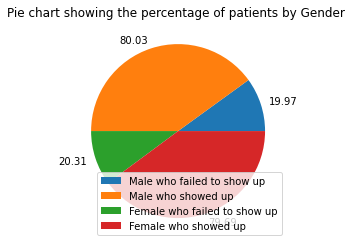

In [85]:
status = ["Male who failed to show up", "Male who showed up", "Female who failed to show up", "Female who showed up"]
plt.pie(sex, labels=sex)
plt.legend(labels=status,loc='lower right')
plt.title("Pie chart showing the percentage of patients by Gender ")
plt.show()

**We now draw a bar graph to represent the above statistics graphically.**

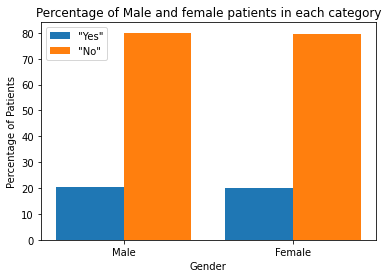

In [86]:
X = ['Male','Female'] 
X_axis = np.arange(len(X))
Gender_yes=[tally_sex3,tally_sex1]
Gender_no=[tally_sex2,tally_sex4]
#Do the actual plotting
plt.bar(X_axis-0.2, Gender_yes, width=0.4, label = '"Yes"')
plt.bar(X_axis +0.2, Gender_no, width=0.4, label = '"No"')
plt.xticks(X_axis,X)
plt.xlabel("Gender")
plt.ylabel("Percentage of Patients")
plt.title("Percentage of Male and female patients in each category")
plt.legend(loc='upper left')
plt.show()

**Summary :** From the above computed percentages/Statistics it is apparent that **19.97%**  and **20.31%** of  Males and females respectively did not show up for the scheduled hospital appointments. **This means that gender has no effect on scheduled hospital appointments.** The proportion of males who show up or do not show up for hospital appointment is the same **(approximately 20%)**

### Research Question 2   : Does appointment day (of week)  affect the rate at which patients shows up?

We start by grouping the patients' appointment by day of week based on whether they showed up or not.

In [23]:
d_day=df_show.groupby(['day_of_week','No-show']).count()['Age']
d_day

day_of_week  No-show
Friday       No         14982
             Yes         4037
Monday       No         18024
             Yes         4690
Saturday     No            30
             Yes            9
Thursday     No         13909
             Yes         3338
Tuesday      No         20488
             Yes         5152
Wednesday    No         20774
             Yes         5093
Name: Age, dtype: int64

Next is that we plot bar graphs of those who showed up and those who did not show up seperately.

<AxesSubplot:title={'center':'A bar graph showing show up status by day of week'}, xlabel='day_of_week,No-show'>

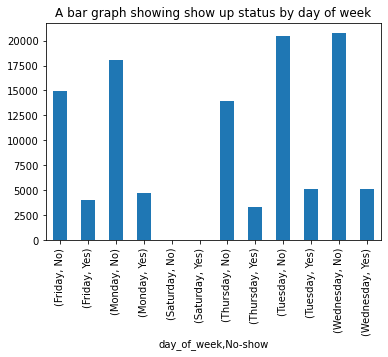

In [91]:
d_day.plot(kind='bar',title='A bar graph showing show up status by day of week')


From the graph above, it apparent that there is a high likelihood that a patient will show up On Tuesday, Wednesday and Thursday compared to Monday and Friday. This is derived from the proportion of the height of the bars.

## Research Question 3 : Does the  patient's underlying condition determine whether a patient shows up or not?

Here we start of by creating a funtion that accepts a column of boolean values (0,1), Computes the percentage of patients who showed up or not based on the boolen values provided and plots a bar graph for the same. This function is used to compute the statistics and plot the bar graphs for Hypertension, Diabetes and Alcoholism respectively.

In [93]:
#A function that takes in a boolean variable and obtains 
#descriptive statistics in terms of percentages of those who show up or not and plots a bar graph
def bool_show_status(col,xlab,ylab,title):
    # Get a summary statistics of those who showed up or not based on SMS_received
    group_tally=df_show.groupby([col,'No-show']).count()['Age']
    group_tally1=round(group_tally[1,'Yes']/(group_tally[1].sum())*100,2) #Percentage of 'Yes' and received SMS
    group_tally2=round(group_tally[1,'No']/(group_tally[1].sum())*100,2) #Percentage of 'No' and received SMS
    group_tally3=round(group_tally[0,'Yes']/(group_tally[0].sum())*100,2)#Percentage of 'Yes' and never received SMS
    group_tally4=round(group_tally[0,'No']/(group_tally[0].sum())*100,2)#Percentage of 'No' and never received SMS
    X = [1,0] 
    X_axis = np.arange(len(X))
    group_yes=[group_tally1,group_tally3]
    group_no=[group_tally2,group_tally4]
    #Do the actual plotting
    plt.bar(X_axis-0.2, group_yes, width=0.4, label = 'Failed to show up')
    plt.bar(X_axis +0.2, group_no, width=0.4, label = 'showed up')
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.xticks(X_axis,X)
    plt.legend(loc='upper left')
    plt.show()
    return [group_tally1,group_tally2,group_tally3,group_tally4]

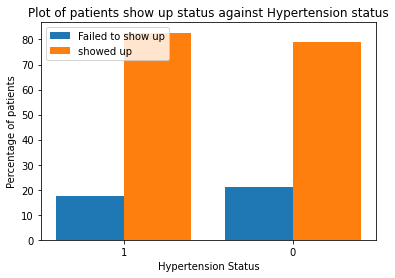

[17.3, 82.7, 20.9, 79.1]

In [94]:
bool_show_status('Hypertension','Hypertension Status','Percentage of patients','Plot of patients show up status against Hypertension status')

**Summary:** From this analysis is clear that **17.30%** and **20.90%** of the Hypertensive and non-Hypertensive patients respectively failed to show up for the scheduled hospital appointments. This implies that a Hypertensive patient is more likely to show up compared to a non-Hypertensive patient.

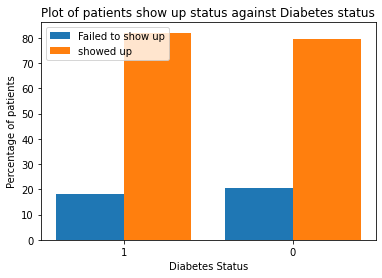

[18.0, 82.0, 20.36, 79.64]

In [95]:
bool_show_status('Diabetes','Diabetes Status','Percentage of patients','Plot of patients show up status against Diabetes status')

**Summary:** From this analysis is clear that **18.00%** and **20.36%** of the diabetic and non-diabetic patients respectively failed to show up for a scheduled hospital appointment. This implies that a diabetic patient is more likely to show up compared to a non-diabetic patient.

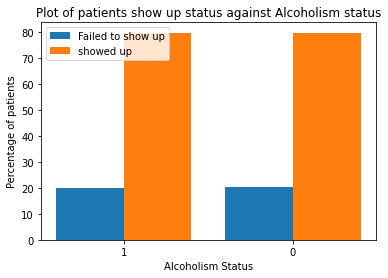

[20.15, 79.85, 20.19, 79.81]

In [96]:
bool_show_status('Alcoholism','Alcoholism Status','Percentage of patients','Plot of patients show up status against Alcoholism status')

**Summary:** From this analysis is clear that **20.15%** and **20.19%** of the alcoholic and non-alcoholic patients respectively failed to show up for the scheduled hospital appointments. This implies that alcoholism may not be a factor to consider when predicting whether a patient shows up or not for a scheduled hospital appointment.

## Research Question 4 : Are patients  enrolled in Brasilian welfare program Bolsa Família most likely to show up for scheduled hospital appointments  than those who are not? 

Here we start by summarizing the data to identify the number of patients enrolled or not enrolled in the Brasilian welfare program who showed up or not for a scheduled hospital appointment. We make use of the function created in question 3 above.

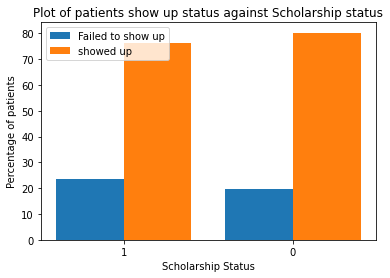

[23.73630420771568, 76.26369579228432, 19.807354638037424, 80.19264536196258]

In [52]:
bool_show_status('Scholarship','Scholarship Status','Percentage of patients','Plot of patients show up status against Scholarship status')

**Summary:** From the bar graph above, it is clear that **23.74%** and **19.81%** of patients enrolled and not enrolled in Brasilian welfare program respectively  failed to show up for the scheduled hospital appointments. This implies that a person who is not enrolled in the   Brasilian welfare program is more likely to show up than the one who is enrolled. Below is a graphical representation of the above statistics.

### Research Question 5: Are patients who receive an SMS most likely going to show up for scheduled hospital appointments compared to those who don't?

To answer this question, we start by grouping the patients by whether they received the sms or not and whether they showed up for the scheduled hospital appointment or not. 

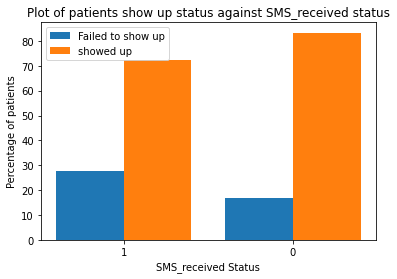

[27.574544839637, 72.425455160363, 16.703533926762965, 83.29646607323703]

In [53]:
bool_show_status('SMS_received','SMS_received Status','Percentage of patients','Plot of patients show up status against SMS_received status')

**Summary:** From the bar graph plot above it is apparent that that **27.57%** and **16.70%** of patients who receive and fail to receive SMS respectively failed to show up for the scheduled hospital appointment. This implies that a patient who receives an SMS is less likely to show up than the one who did not. Conversely, the show up rate of patients who didn't receive SMS (**83.30%**) is higher than for those who received the SMS(**72.43%**).




### Research Question 6: Does the age of a patient affect the likelihood of showing up for a scheduled appointment?

We begin by identifying those who showed up or not by age and then plot a histogram for the same as shown below.

Text(0, 0.5, 'Number of patients')

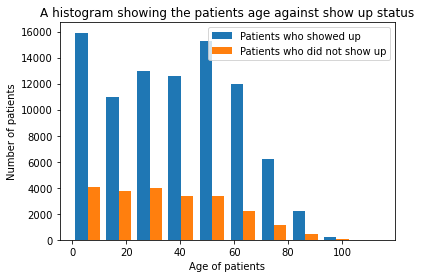

In [103]:
Age_showNo=df_show[df_show['No-show']=='No']
Age_showyes=df_show[df_show['No-show']=='Yes']
plt.hist([Age_showNo['Age'],Age_showyes['Age']])
plt.title('A histogram showing the patients age against show up status')
leg=['Patients who showed up','Patients who did not show up']
plt.legend(labels=leg)
plt.xlabel('Age of patients')
plt.ylabel('Number of patients')



Text(0, 0.5, 'Number of patients')

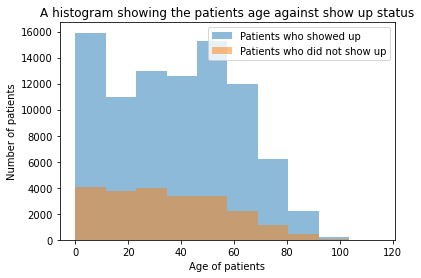

In [104]:
plt.hist(Age_showNo['Age'], alpha=0.5)
plt.hist(Age_showyes['Age'], alpha=0.5)
plt.title('A histogram showing the patients age against show up status')
leg=['Patients who showed up','Patients who did not show up']
plt.legend(labels=leg)
plt.xlabel('Age of patients')
plt.ylabel('Number of patients')
#[Age_showNo['Age'],Age_showyes['Age']]

**Summary:** From the above histogram plot, there is a relationship between age and the likelihood of showing up for scheduled hospital appointments. Patients aged between 0-10 years and 50-60 years old are more likely to fail to show up for a scheduled hospital appointment.

<a id='conclusions'></a>
## Conclusions
The percentage of Males and females who did not show up for the scheduled hospital appointments 19.97% and 20.31% respectively. This means that gender has no effect on scheduled hospital appointments since this percentage is almost the same (20%). Again is that on Tuesday and Wednesday there is a high likelihood that a patient will 
show up and on Monday and Friday the likelihood is lower. Diabetic and hypertensive patients are more likely to show up for scheduled appointments compared to those without any underlying condition. Alcoholism has no effect on scheduled appointments (20.15% of alcoholic and 20.19% of non-alcoholic patients did not show up). Patients enrolled in Brasilian welfare program are less likely to show up for the scheduled hospital appointments compared to those who are not. Patients who receive an SMS are less likely to show up for the scheduled hospital appointment compared to those who don’t. 

**Limitation:** One limitation in answering the research questions is that the categorical variable "Neighbourhood" has so many values that cannot be ploted against the show up status without leaving out some values. i.e the number of unique values is too many to be plotted. This variable could be having an effect on the other feature variables too.